# Assignment 1 - Solutions 

#### TA: Dimitrios Tanoglidis

Solutions to the first assignment are provided. The present text was created by exporting as PDF an IPython notebook. 
Ipython notebooks are extremely useful because they allow you to combine text, including equation in LaTeX form, code and plots. The code is written in python; I highly recomend you to learn how to code in python as soon as possible. It is extremely useful, especially if you want to do research in astronomy. If you have questions about the provided code, feel free to ask me. 

## Solving Kepler's equation, plotting orbits

#### a) 

From equation (41) (can be derived using eqs. (39) and (40) of Murray & Correia - M&C from now on) we have:

\begin{equation}
M = E - e\sin E
\end{equation}

considering the eccentricities $e=[0.0,0.2,0.6,0.9]$ and $E$ as the independent variable we have.
Pick a range of $E \in [0, 2\pi]$.

In [59]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


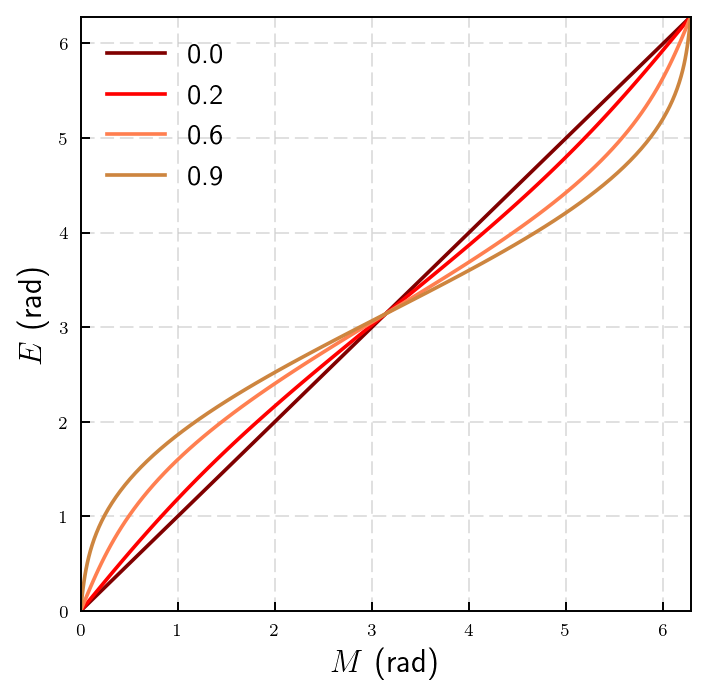

In [60]:
# A range of values in E
E = np.linspace(0.0,2.0*np.pi,100) 
#Eccentricities
ecc = [0.0,0.2,0.6,0.9]
colors = ['maroon','red','coral','peru']

plot_pretty()
fig = plt.figure(figsize = (4.5,4.5))

for i in range(4):
    M = E - ecc[i]*np.sin(E)
    plt.plot(M,E, c=colors[i], label=ecc[i])
    plt.grid(2,ls='--',alpha=0.4)
    
plt.xlim(0,2*np.pi);plt.ylim(0,2*np.pi)
plt.xlabel('$M$ (rad)', fontsize=13)
plt.ylabel('$E$ (rad)', fontsize=13)
    
plt.legend(frameon=False, loc='upper left', fontsize=12)
plt.show()

#### b) 

Using equation (43) of (M&C), for $g(E) = E - \sin E$, we have:

\begin{equation}
E_{i+1} = E_i - \frac{g(E_i)}{g'(E_i)} = E_i - \frac{E_i - e\sin E_i - M}{1 - e\cos E_i }
\end{equation}

Let's find $E$ for $M=0.95$, $e=0.9$.

Consider 10 iterations

Let's have as our first guess $E_0 = M$. Here is a sort piece of code that produces the values of $E_i$ for a number of iterations. In this case it is easy to do this even with your calculator.


In [61]:
M = 0.95
ecc = 0.9

#initial guess
E = M
for i in range(11):
    E = E - (E - ecc*np.sin(E)-M)/(1-ecc*np.cos(E))
    print('iteration %.i:'% i)
    print('%.16f'%np.float64(E))

iteration :
2.4864043298247918
iteration 1:
1.9098382613373386
iteration 2:
1.8243539752988767
iteration 3:
1.8218000823441076
iteration 4:
1.8217977596993011
iteration 5:
1.8217977596973791
iteration 6:
1.8217977596973791
iteration 7:
1.8217977596973791
iteration 8:
1.8217977596973791
iteration 9:
1.8217977596973791
iteration 10:
1.8217977596973791


#### c)  

Here I will assume for simplicity that $a = 1$. The procedure is the following:

First we get 20 values of $M$ in the interval $[0,2\pi]$.

Then for each of these we determine $E$ as in the previous problem.

Having $E$, the eccentric anomaly, we can find the true anomaly $f$, using the formula:

\begin{equation}
\tan \frac{f}{2} = \sqrt{\frac{1+e}{1-e}}\tan \frac{E}{2} \Rightarrow f = 2\tan^{-1}\left[ \sqrt{\frac{1+e}{1-e}}\tan \frac{E}{2} \right]
\end{equation}

(see page 5 of Prof. Fabrycky's notes. For the derivation of this formula see the wikipedia page for the eccentric anomaly, https://en.wikipedia.org/wiki/Eccentric_anomaly ).

Then, having the true anomaly we can find $r$ from eq. (20) of M&C:

\begin{equation}
r = \frac{a(1-e^2)}{1+e\cos f}
\end{equation}

setting for simplicity $a=1$.

The cartesian coordinates can be easily determined: 
\begin{eqnarray}
x = r\cos f\\
y = r\sin f
\end{eqnarray}

Code is provided that solves these equations.

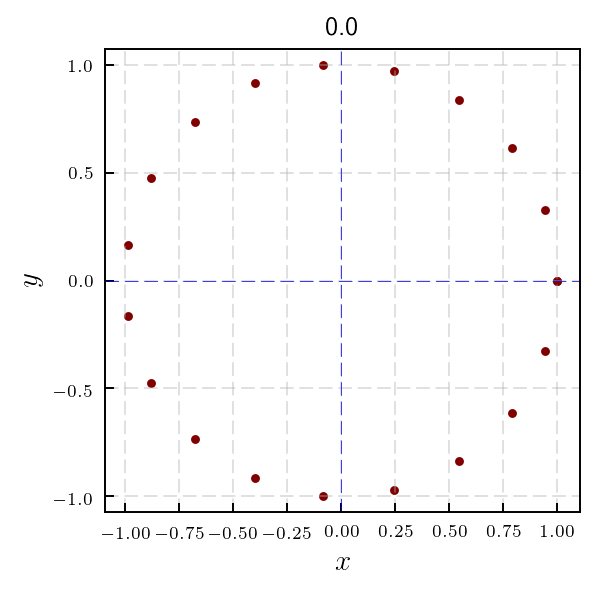

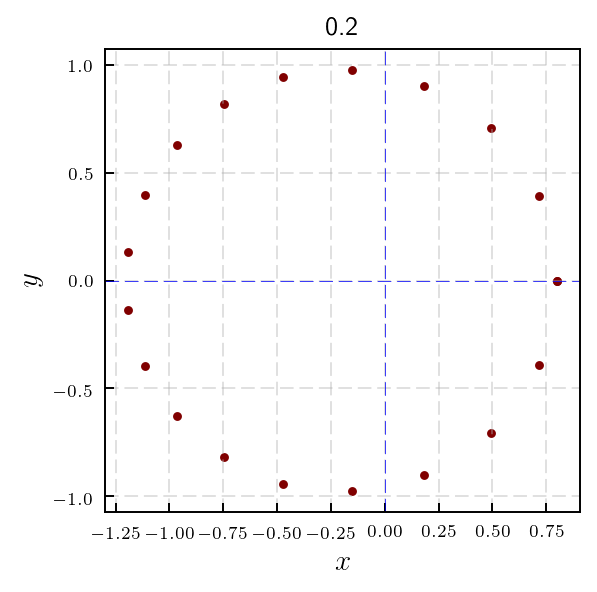

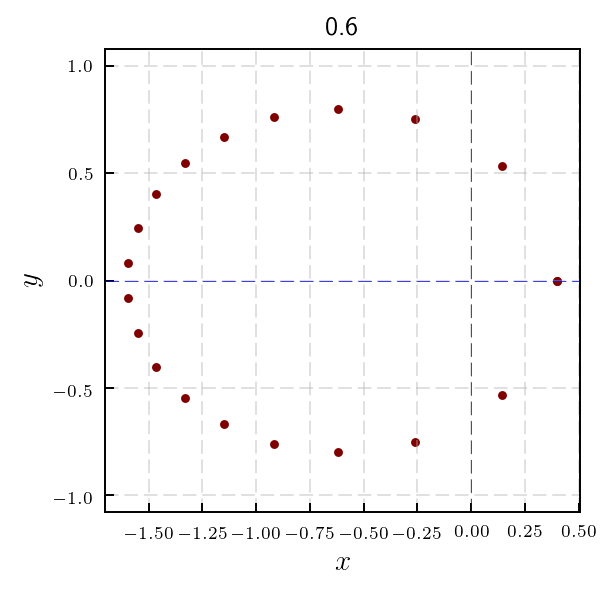

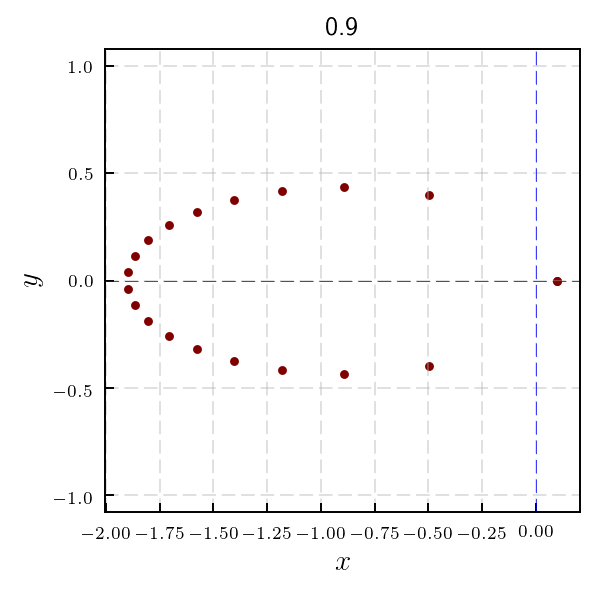

In [62]:
# First write a function that takes M as input, finds E and then f
#inputs M and eccentricity

def get_f(M, ecc):
    #First find E 
    E = M #initial guess
    for i in range(15):
        E = E - (E - ecc*np.sin(E)-M)/(1-ecc*np.cos(E))
        
    #Now we have E. Find f
    f = 2.0*np.arctan(np.sqrt((1.0 + ecc)/(1.0 - ecc))*np.tan(E/2.0))
    return f


#Now, let's write a function that takes as inputs M and eccentricity
#and returns the cartesian coordinates x, y as defined above.

def cartesian_coords(M, ecc):
    # M is in principle  an array
    n = np.size(M)  # the size of the array in M
    f = np.zeros(n) #empty array that will be populated by the r values
    r = np.zeros(n) #empty array that will be populated by the r values 
    x = np.zeros(n);y = np.zeros(n) #empty arrays for the x and y coordinates
    # Note that the above arrays have the size of M
    
    #Populate the r array now
    for i in range(n):
        M_i = M[i] # the particular value of M
        f[i] = get_f(M_i,ecc)  #get the f value - call the previous function
        
        #Now get r - here I use for simplicity a=1
        r[i] = (1.0 - ecc**2.0)/(1.0 + ecc*np.cos(f[i]))
        
        
    #Now we have r and f, easy to take x,y 
    x = r*np.cos(f)
    y = r*np.sin(f)
    
    return x,y

#==============================================================
        
M = np.linspace(0.0,2.0*np.pi,20)  # 20 values for M

#eccentricities
eccentr = [0.0,0.2,0.6,0.9]

#=============================================================
#Plot now

fig = plt.figure(figsize = (4.5,4.5))

for i in range(4): #run for the four different eccentricities
    ecc_i = eccentr[i]
    
    fig = plt.figure(figsize = (3.5,3.5))
    
    x,y = cartesian_coords(M, ecc_i)
    
    plt.scatter(x,y,s = 7, c='maroon')
    
    plt.title(ecc_i)
    plt.axis('equal')
    plt.yticks([-1.0,-0.5,0.0,0.5,1.0])
    plt.axhline(y=0.0, c='blue', ls='--', linewidth=0.3)
    plt.axvline(x=0.0, c='blue', ls='--', linewidth=0.3)
    plt.grid(2,ls='--',alpha=0.4)
    plt.rc('xtick', labelsize=7)
    plt.rc('ytick',labelsize=7)
    plt.xlabel('$x$', fontsize=12)
    plt.ylabel('$y$', fontsize=12)
    
    plt.show()

    
    
    

And, let's see them all together

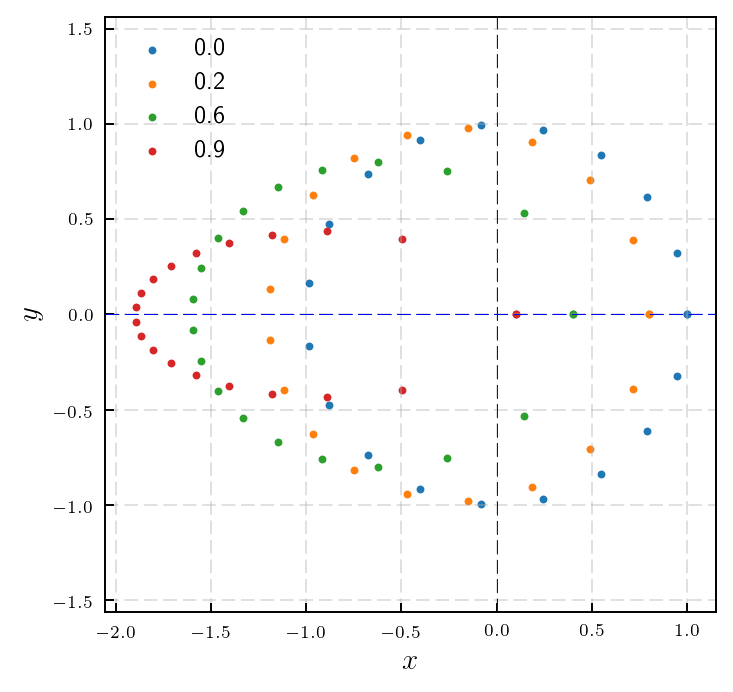

In [63]:
fig = plt.figure(figsize = (4.5,4.5))

for i in range(4): #run for the four different eccentricities
    ecc_i = eccentr[i]
    
    x,y = cartesian_coords(M, ecc_i)
    
    plt.scatter(x,y,s = 5, label=ecc_i)
    
    
    plt.axis('equal')
    #plt.yticks([-1.0,-0.5,0.0,0.5,1.0])
    plt.axhline(y=0.0, c='blue', ls='--', linewidth=0.3)
    plt.axvline(x=0.0, c='blue', ls='--', linewidth=0.3)
    plt.grid(2,ls='--',alpha=0.4)
    plt.rc('xtick', labelsize=7)
    plt.rc('ytick',labelsize=7)
    plt.xlabel('$x$', fontsize=12)
    plt.ylabel('$y$', fontsize=12)
    
plt.legend(frameon=False, loc='upper left', fontsize=10)
plt.show()



## Keplerian orbital elements

Parts a) & b) and the comments of part c) are taken from Prof. Fabrycky's solutions

#### a) 
\begin{equation}
\begin{bmatrix}
    X\\
    Y\\
    Z
\end{bmatrix} = \begin{bmatrix}
 	\cos \Omega & -\sin \Omega & 0 \\
    \sin \Omega & \cos \Omega & 0 \\
    0	& 0	&	1
\end{bmatrix}
\begin{bmatrix}
 	1	& 0	& 0 \\
    0	& \cos i & -\sin i \\
    0	& \sin i & \cos i
\end{bmatrix}
\begin{bmatrix}
 	\cos \omega & -\sin \omega & 0 \\
    \sin \omega & \cos \omega & 0 \\
    0	& 0	&	1
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix}
\end{equation}

\begin{equation}
\begin{bmatrix}
    X\\
    Y\\
    Z
\end{bmatrix}= 
\begin{bmatrix}
 	\cos \Omega & -\sin \Omega \cos i & \sin \Omega \sin i  \\
    \sin \Omega & \cos \Omega \cos i & -\cos \Omega \sin i \\
    0	& \sin i	&	\cos i
\end{bmatrix}
\begin{bmatrix}
 	\cos \omega & -\sin \omega & 0 \\
    \sin \omega & \cos \omega & 0 \\
    0	& 0	&	1
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix}
\end{equation}

\begin{equation}
\begin{bmatrix}
    X\\
    Y\\
    Z
\end{bmatrix} =
\begin{bmatrix}
 	\cos \Omega \cos \omega - \sin \Omega \cos i \sin \omega & -\cos \Omega \sin \omega - \sin \Omega \cos i \cos \omega & \sin \Omega \sin i  \\
    \sin \Omega \cos \omega +\cos \Omega \cos i \sin \omega & -\sin \Omega \sin \omega + \cos \Omega \cos i \cos \omega & -\cos \Omega \sin i \\
    \sin i \sin \omega & \sin i \cos \omega & \cos i
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix}
\end{equation}

Setting: 

\begin{equation}
\begin{bmatrix}
    x\\
    y\\
    z
\end{bmatrix} =
\begin{bmatrix}
    r \cos f \\
    r \sin f \\
    0
\end{bmatrix}
\end{equation}

and using the equalities: 
\begin{equation}
\cos \omega \cos f - \sin \omega \sin f = \cos (\omega+f)
\end{equation}

\begin{equation}
\cos \omega \sin f + \sin \omega \cos f = \sin (\omega+f)
\end{equation}

we have:

\begin{equation}
\begin{bmatrix}
    X\\
    Y\\
    Z
\end{bmatrix} =
\begin{bmatrix}
   r (\cos \Omega \cos (\omega+f) - \sin \Omega \cos i \sin (\omega+f))  \\
   r (\sin \Omega \cos (\omega+f) + \cos \Omega \cos i \sin (\omega+f)) \\
   r ( \sin (\omega + f) \sin i )
\end{bmatrix}
\end{equation}


#### b)

Now, using:
\begin{equation}
r = a(1-e^2)/(1+e \cos f) 
\end{equation}
we have: 

\begin{equation}
\begin{bmatrix}
    X\\
    Y\\
    Z
\end{bmatrix} =
\begin{bmatrix}
 	a\frac{1-e^2}{1+e \cos f}  (\cos \Omega \cos (\omega+f) - \sin \Omega \cos i \sin (\omega+f))  \\
   a\frac{1-e^2}{1+e \cos f} (\sin \Omega \cos (\omega+f) + \cos \Omega \cos i \sin (\omega+f)) \\
   a\frac{1-e^2}{1+e \cos f} ( \sin (\omega + f) \sin i )
\end{bmatrix}
\end{equation}


#### c)

From table 6 of Nelson et al. 2016:

\begin{eqnarray}
Planet\qquad \qquad a(au)\qquad \quad e \quad i(^\circ)\qquad  \quad \omega(^\circ)\qquad  \quad \Omega(^\circ) \quad M(^\circ)\\
a \qquad  0.02183945 \quad  0.113 \quad 87.44 \quad -139.25 \quad 0.00 \quad 301.24 \\ 
c \qquad 0.135984 \quad 0.2532 \quad 51.63 \quad 119.26 \quad -2.72 \quad -223.46 \\
b \qquad 0.218609 \quad  0.0371 \quad 52.61 \quad 111.81 \quad 0.00 \quad -286.01 \\
e \qquad 0.3495 \quad 0.046 \quad 55.51 \quad 122.34 \quad 5.01 \quad -184.28 \\
\end{eqnarray}

Having these, first we solve Kepler's equations to find $f$ and $r$ and then the above equations to find $X,Y,Z$.

We can use a similar procedure to the above problem in finding $f$ and $r$. Here I will use a different sequence of equations. First from $M$ I will find $E$ as usual. Then from eq (37) of (M&C) find $r$:

\begin{equation}
r = a(1 - e\cos E)
\end{equation}

and then $f$ from equation (20) of (M &C):

\begin{equation}
f = \mbox{acos} \left(\frac{1}{e}\left[\frac{a(1-e^2)}{r}-1 \right]\right)
\end{equation}

In [102]:
# lists with the planet's properties 
# Also convert to rads by multiplying by π/180 
a = np.array([0.02183945,0.135984,0.218609,0.3495])
ecc = np.array([0.113,0.2532,0.0371,0.046])
inc = np.array([87.44,51.63,52.61,55.51])*(np.pi/180.0)
lit_om = np.array([-139.25,119.26,111.81,122.34])*(np.pi/180.0)
big_om = np.array([0.00,-2.72,0.00,5.01])*(np.pi/180.0)
M = np.array([301.24,-223.46,-286.01,-184.28])*(np.pi/180.0)


#function that finds X,Y,Z
def X_Y_Z(a, ecc, inc, lit_om, big_om, M):
    # First from M find E
    
    E = M #initial guess
    for i in range(15):
        E = E - (E - ecc*np.sin(E)-M)/(1-ecc*np.cos(E))
        
    #Now we have E. Find r
    r = a*(1.0 - ecc*np.cos(E))
    #Now find f 
    f = np.arccos((a*(1.0 - ecc**2.0)/r - 1.0)/ecc)
    
    #Name some trigonometric forms that appear all the time
    s_i = np.sin(inc)
    c_i = np.cos(inc)
    s_om = np.sin(big_om)
    c_om = np.cos(big_om)
    s_om_f = np.sin(lit_om + f)
    c_om_f = np.cos(lit_om + f)
    
    #Find X,Y,Z
    X = r*(c_om*c_om_f - s_om*c_i*s_om_f)
    Y = r*(s_om*c_om_f + c_om*c_i*s_om_f)
    Z = r*(s_om_f*s_i)
    
    return X,Y,Z
    
    
#find X,Y,Z now

X,Y,Z = X_Y_Z(a, ecc, inc, lit_om, big_om, M)


#print them

print("X for the four planets:")
print(X)
print("Y for the four planets:")
print(Y)
print("Z for the four planets:")
print(Z)
    
    

X for the four planets:
[ 0.00757161  0.0003418  -0.21340478  0.18926848]
Y for the four planets:
[-0.0008644  -0.10197353 -0.02269998 -0.16612876]
Z for the four planets:
[-0.01933349 -0.12863145 -0.02970108 -0.26494387]


(Prof. Fabrycky's notes): 

The thing I have in mind that seems funny is how close the innermost planet (d) is to the X-Y plane, in the best-fit (small absolute value of Y).  Its inclination is listed as 87.44 deg (from the X-Y plane), so pretty much a transiting configuration, whereas the others have inclinations in the low 50’s.  So the best-fit is very non-coplanar.  However, given the error bars on id=87.44(+41.97-40.94) deg, it is compatible with coplanar.  So if I had taken id=50 deg, I would have gotten much different XYZ for planet d.  [Note that planet c has a small absolute value for X; it just happens to be passing through the Y-Z plane at the time.]

